In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv(r"E:\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000   

In [4]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [5]:
# Descriptive statistics for numerical columns
for col in numerical_cols:
    print(f'\nStatistics for {col}:')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Mode: {df[col].mode()[0]}')
    print(f'Standard Deviation: {df[col].std()}')


Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


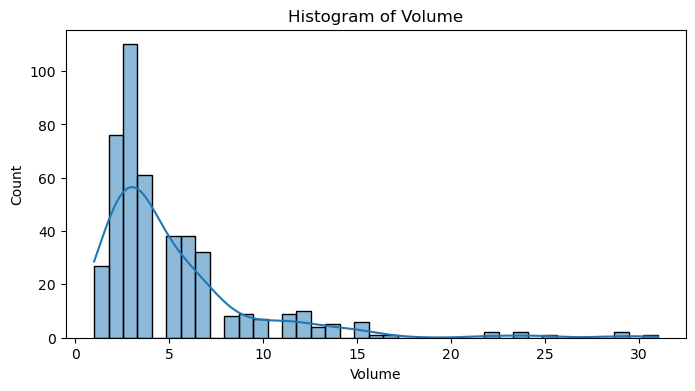

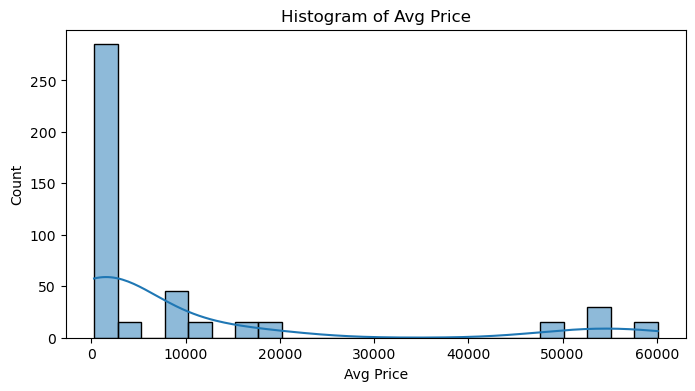

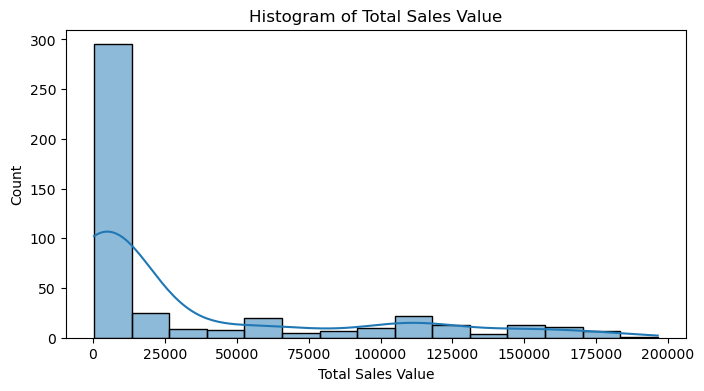

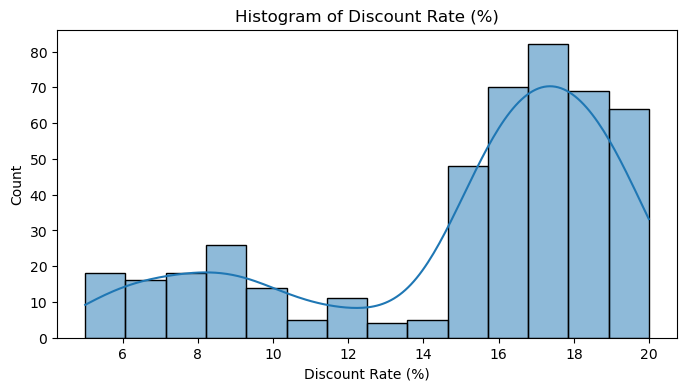

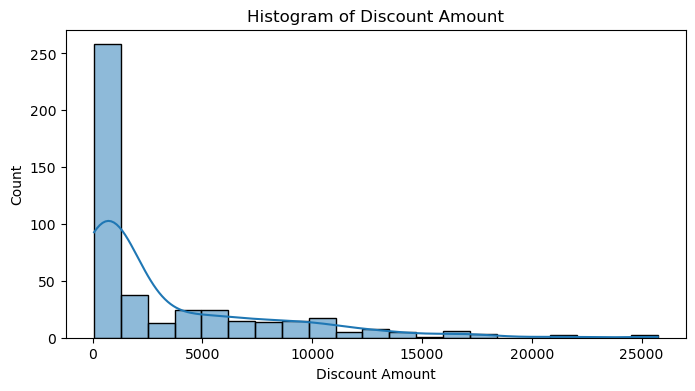

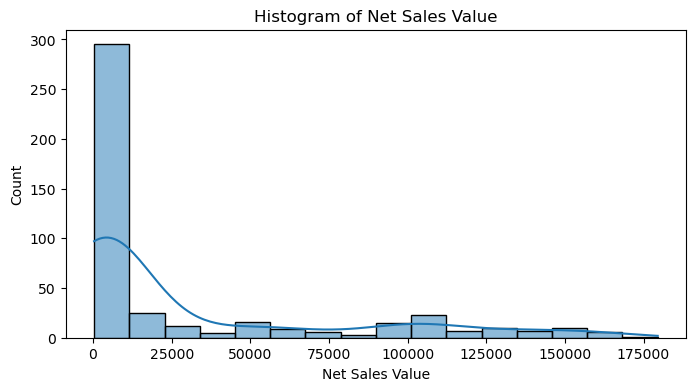

In [6]:
# Data Visualization
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

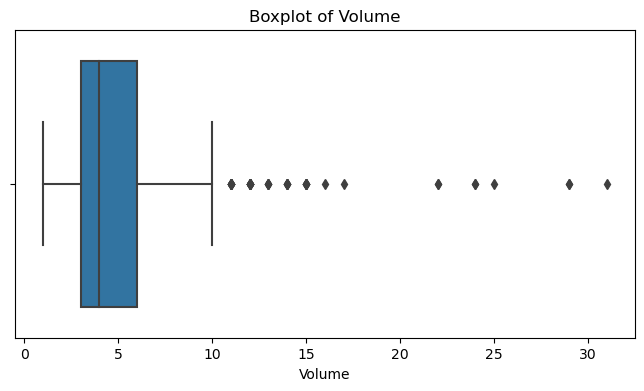

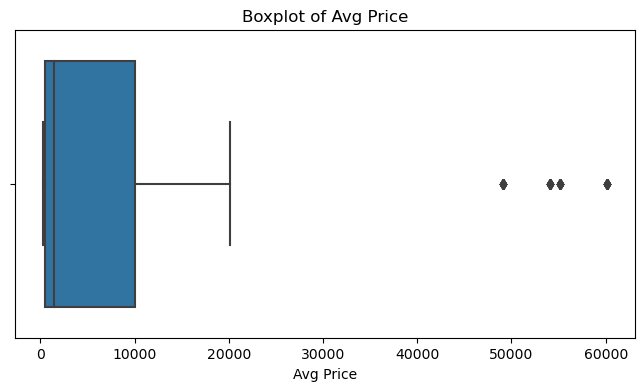

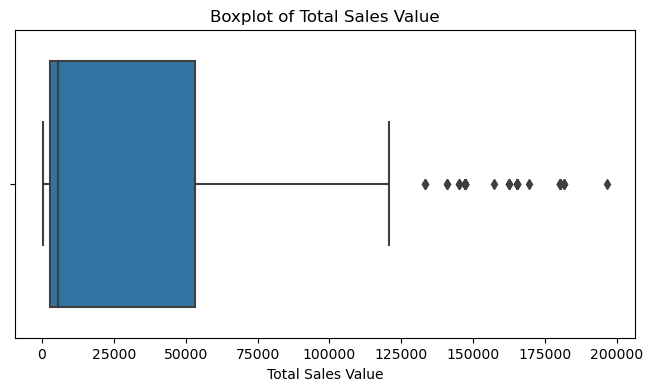

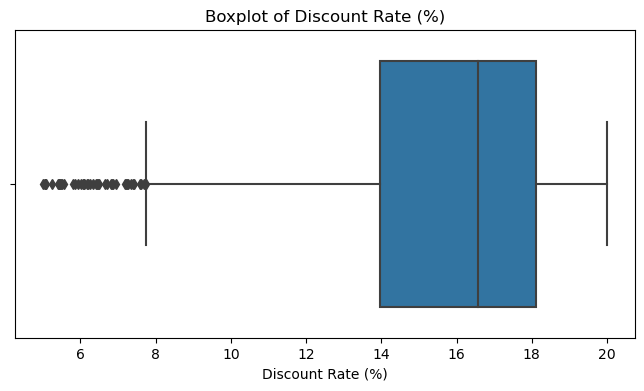

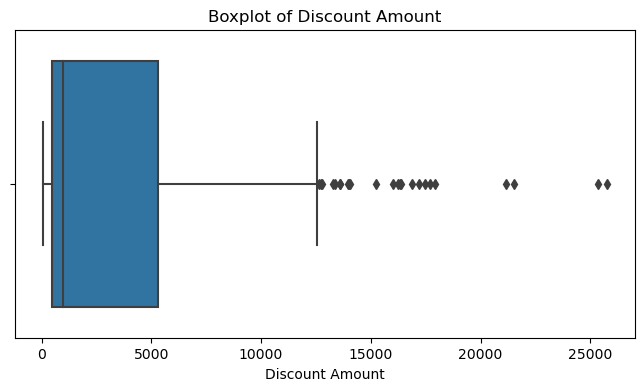

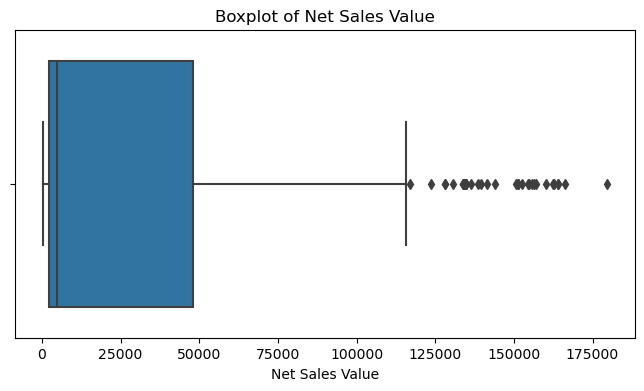

In [7]:
# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

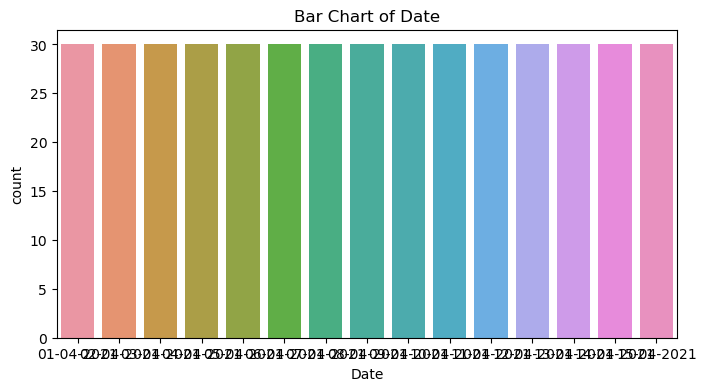

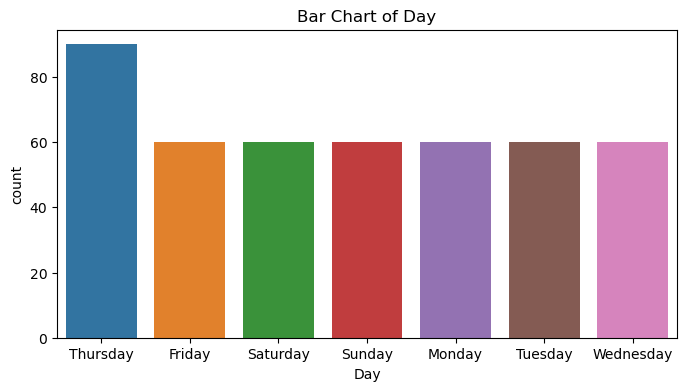

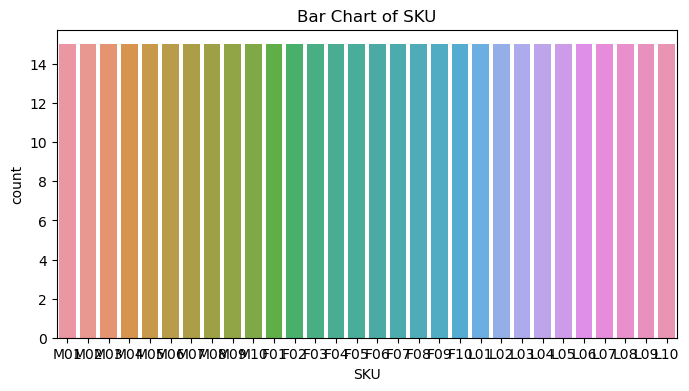

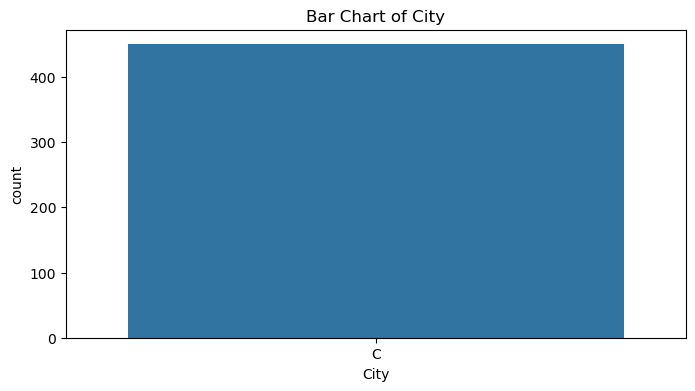

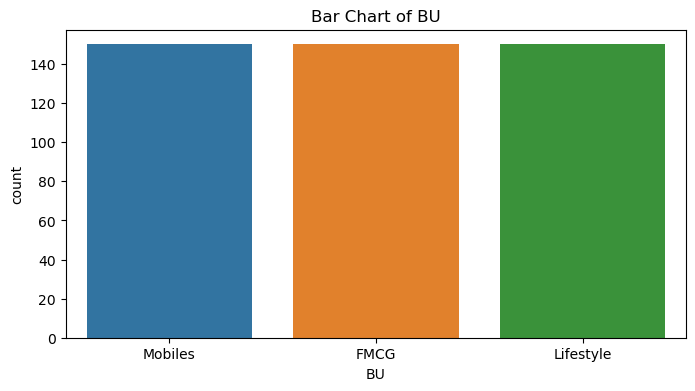

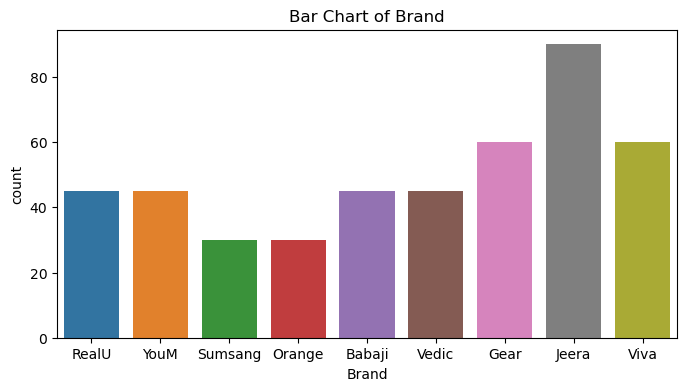

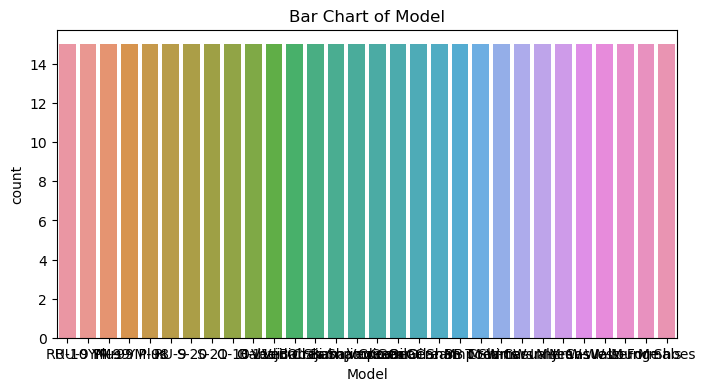

In [8]:
# Bar chart analysis for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.show()

In [9]:
# Standardization of numerical variables
df_standardized = df.copy()
for col in numerical_cols:
    df_standardized[col] = (df[col] - df[col].mean()) / df[col].std()

In [10]:
# Display before and after standardization
print("Before Standardization:\n", df[numerical_cols].head())
print("After Standardization:\n", df_standardized[numerical_cols].head())

Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552    

In [11]:
# Conversion of categorical data into dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [12]:
# Display a portion of the transformed dataset
print("One-Hot Encoded Dataset:\n", df_encoded.head())

One-Hot Encoded Dataset:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil 

In [16]:
# Save the processed dataset to a new file if needed
df_encoded.to_csv(r"E:\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv", index=False)

In [17]:
df_encoded.to_csv

<bound method NDFrame.to_csv of      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295